In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# !pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import altair as alt
import warnings
warnings.filterwarnings('ignore')
# !pip install  altair_saver


C:\Users\fredg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
### RETRIEVING TOP RESULTS ACCORDING TO METRIC
def top_results(metrics,data):
    try:
        data["top_n"] = data["TOP_N"]
        del data["TOP_N"]
    except:
        pass
    df1 = data.reset_index()
    df1 = df1[["index","threshold","Precision","Recall","F1","Recall_asin","Precision_asin","F1_asin"]]
    df1.columns = ["idx","threshold","Precision","Recall","F1","Recall_asin","Precision_asin","F1_asin"]
    
    col = metrics
    machin = data.groupby(['n_words','top_n'])[col].nlargest(1).reset_index()
    del machin[col]
    machin.columns = ["n_words","top_n","idx"]
    df_merge = machin.merge(df1, on = "idx", suffixes=(False, False))
    df_merge["n_words"] = df_merge["n_words"].astype(int)
    df_merge["top_n"] = df_merge["top_n"].astype(int)
    del df_merge["idx"]
    
    return df_merge


### GROUPING FUNCTION ACCORDING TO FIXED THRESHOLD
def transfo(df_full, threshold, asin):
    # df_full = df_full[df_full["threshold"] == threshold]
    try:
        df_full["top_n"] = df_full["TOP_N"]
        del or_res["TOP_N"]
    except:
        pass

    # df1 = df1[["index","threshold","accuracy","Precision","Recall","F1","Precision_asin","F1_asin"]]
    cols = ["Precision", "Recall", "F1"]
    if asin:
        cols = [x + "_asin" for x in cols]
    
    df_filt = df_full[df_full["threshold"] == threshold]
    
    gb = df_filt.groupby(['n_words','top_n'])[cols].min().reset_index()
    gb["n_words"] = gb["n_words"].apply(lambda x: "{} words".format(str(int(x))))
    gb3 = gb[gb["top_n"]==3]
    
    try:
        del gb3["top_n"]
        gb5 = gb[gb["top_n"]==5]
        del gb5["top_n"]
        gb3.columns = ["n_words","Precision", "Recall", "F1"]
        gb5.columns = ["n_words","Precision", "Recall", "F1"]
    except:
        pass
    
    return gb3, gb5

def confusion_df(df_full):
    # df_full["TP rate"] = np.round(df_full["TP"] / (df_full["TP"] + df_full["FN"]),2)
    # df_full["FP rate"] = np.round(df_full["FP"] / (df_full["FP"] + df_full["TN"]),2)
    
    df_full["TP"] = np.round(df_full["TP_asin"] / (df_full["TP_asin"] + df_full["FN_asin"]),2)
    df_full["FP"] = np.round(df_full["FP_asin"] / (df_full["FP_asin"] + df_full["TN_asin"]),2)
    df_full["FP"] = np.round(df_full["FP_asin"] / (df_full["FP_asin"] + df_full["TN_asin"]),2)
    df_full["TN"] = df_full["TN_asin"]
    df_full["Precision"] = np.round(df_full["TP_asin"] / (df_full["TP rate"] + df_full["FP rate"]),2)
    df_full["Recall"] = np.round(df_full["TP_asin"] / (df_full["TP_asin"] + df_full["TN_asin"]),2)
    df_full["F1"] = np.round(df_full["FP_asin"] / (df_full["FP_asin"] + df_full["TN_asin"]),2)
    
    df_reduced = df_full[df_full["top_n"] == 3][["n_words",'threshold','Precision','Recall',"F1", "TP rate", "FP rate"]]
    df_reduced["n_words"] = df_reduced["n_words"].apply(lambda x: "{} words".format(str(int(x))))
    df_rec = df_reduced[df_reduced["n_words"] == "3 words"][["Precision",'Recall',"TP rate", "FP rate"]]
    df_reduced.head(50)

    df_reduced.columns = ['Query length', 'Similarity threshold', 'Precision score','Recall score', "F1 score", "TP rate", "FP rate"]
    return df_reduced

## preparing all datasets for visualizations ###

filename1 = "results/M2R1_full_original_results.csv"
filename2 = "results/M2+R2_full_results.csv"
file1 = "results/M2R1_original_summary_results.csv"
file2 = "results/M2+R2_summary_results.csv"

M2R1 = pd.read_csv(filename1)
M2R2 = pd.read_csv(filename2)
metrics = 'F1'
summary_M2R1 = top_results(metrics,M2R1)
summary_M2R2 = top_results(metrics,M2R2)
thre = 0.22
M2R1_top3, M2R1_top5 = transfo(M2R1, thre, asin = False)
M2R1_top3_asin, M2R1_top5_asin = transfo(M2R1, thre, asin = False)
thre = 0.51
M2pR2_top3, M2pR2_top5 = transfo(M2R2, thre, asin = False)    
M2pR2_top3_asin, M2pR2_top5_asin = transfo(M2R2, thre, asin = True)

filename3 = "results/LSI_results_25.csv"
M1 = pd.read_csv(filename3)
thre = 0.76
M1_top3 = transfo(M1, thre, asin = False)[0]
metrics = 'F1'
summary_M1 = top_results(metrics,M1)
summary_M1

,n_words,top_n,threshold,Precision,Recall,F1,Recall_asin,Precision_asin,F1_asin
0,3,3,0.75,0.28,0.19,0.23,0.0,0.0,NaN
1,3,5,0.71,0.28,0.24,0.26,0.0,0.0,NaN
2,4,3,0.72,0.32,0.26,0.29,0.0,0.0,NaN
3,4,5,0.72,0.37,0.31,0.34,0.0,0.0,NaN
4,5,3,0.76,0.38,0.27,0.32,0.0,0.0,NaN
5,5,5,0.70,0.36,0.36,0.36,0.0,0.0,NaN
6,6,3,0.76,0.38,0.26,0.31,0.0,0.0,NaN
7,6,5,0.74,0.39,0.33,0.36,0.0,0.0,NaN
8,7,3,0.77,0.42,0.28,0.34,0.0,0.0,NaN
9,7,5,0.72,0.39,0.35,0.37,0.0,0.0,NaN


In [533]:
summary_M1

,n_words,top_n,threshold,Precision,Recall,F1,Recall_asin,Precision_asin,F1_asin
0,3,3,0.75,0.28,0.19,0.23,0.0,0.0,NaN
1,3,5,0.71,0.28,0.24,0.26,0.0,0.0,NaN
2,4,3,0.72,0.32,0.26,0.29,0.0,0.0,NaN
3,4,5,0.72,0.37,0.31,0.34,0.0,0.0,NaN
4,5,3,0.76,0.38,0.27,0.32,0.0,0.0,NaN
5,5,5,0.70,0.36,0.36,0.36,0.0,0.0,NaN
6,6,3,0.76,0.38,0.26,0.31,0.0,0.0,NaN
7,6,5,0.74,0.39,0.33,0.36,0.0,0.0,NaN
8,7,3,0.77,0.42,0.28,0.34,0.0,0.0,NaN
9,7,5,0.72,0.39,0.35,0.37,0.0,0.0,NaN


In [518]:
summary_M2R1

,n_words,top_n,threshold,Precision,Recall,F1,Recall_asin,Precision_asin,F1_asin
0,3,3,0.00,0.19,0.13,0.15,0.07,0.11,0.09
1,3,5,0.00,0.24,0.17,0.20,0.11,0.15,0.13
2,4,3,0.00,0.20,0.16,0.18,0.12,0.15,0.13
3,4,5,0.21,0.25,0.19,0.22,0.15,0.20,0.17
4,5,3,0.24,0.25,0.19,0.22,0.15,0.21,0.18
5,5,5,0.18,0.26,0.24,0.25,0.20,0.21,0.20
6,6,3,0.22,0.25,0.21,0.23,0.19,0.22,0.20
7,6,5,0.22,0.28,0.24,0.26,0.22,0.25,0.23
8,7,3,0.22,0.26,0.22,0.24,0.21,0.25,0.23
9,7,5,0.23,0.29,0.25,0.27,0.23,0.28,0.25


In [466]:
M2pR2_top3_asin

,n_words,Precision,Recall,F1
0,3 words,0.45,0.47,0.46
2,4 words,0.60,0.62,0.61
4,5 words,0.70,0.72,0.71
6,6 words,0.79,0.81,0.80
8,7 words,0.82,0.86,0.84


In [534]:
M2pR2_top3

,n_words,Precision,Recall,F1
0,3 words,0.54,0.55,0.54
2,4 words,0.64,0.66,0.65
4,5 words,0.74,0.76,0.75
6,6 words,0.81,0.82,0.81
8,7 words,0.83,0.86,0.84


In [535]:
M2pR2_top5_asin

,n_words,Precision,Recall,F1
1,3 words,0.48,0.54,0.51
3,4 words,0.61,0.67,0.64
5,5 words,0.71,0.75,0.73
7,6 words,0.80,0.85,0.82
9,7 words,0.83,0.88,0.85


### M1R2 / M2+R2 Comparitive scores at optimal similarity threshold

In [536]:
def bar_chart(df, labels, title, filename, threshold):
    x_labels = list(df[labels])
    cols = list(df.columns)[1:]

    y_labels=[0,0.2,0.4,0.6,0.8,1.0]
    x = np.arange(len(x_labels)) 

    colors = ["#79A3CE", "#436F98",'#92568B','#D6F4FF']
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    ax.set_title('{}'.format(title),size=14)
    ax.set_xticks(x, x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel("Length of Queries", size =12)
    ax.legend(facecolor="white", fontsize=13)
    if threshold:
    
        ax.axhline(y = threshold, xmin=0.05, xmax=0.95, color = "black", linestyle ='--', linewidth = 0.5)
        ax.annotate('Similarity Threshold: {}'.format(threshold), (0.65,threshold -0.055),
            textcoords='axes fraction', color = "black",
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
    
    liste = []
    width = 0.4
    longueur = len(cols)
    pad = width/ longueur
    
    
    rects1 = ax.bar(x - width*.66, df.Precision, width*.66, label='Precision',color=colors[0],alpha=0.6)
    rects2 = ax.bar(x , df.Recall, width*.66, label='Recall',color=colors[1], alpha=0.6)
    rects3 = ax.bar(x + width*.66, df.F1, width*.66, label='F1 ',color=colors[2], alpha=0.6)
    
    ax.bar_label(rects1, padding=3, size=10)
    ax.bar_label(rects2, padding=3,size=10) 
    ax.bar_label(rects3, padding=3,size=10) 
    ax.legend(facecolor="white", fontsize=10)
    ax.set_ylim(0,1)
    ax.grid(True)
    fig.tight_layout()
    fig.savefig(filename, bbox_inches='tight')

    plt.show()


In [537]:
M1_top3

,n_words,Precision,Recall,F1
0,3 words,0.29,0.18,0.22
2,4 words,0.34,0.23,0.27
4,5 words,0.38,0.27,0.32
6,6 words,0.38,0.26,0.31
8,7 words,0.40,0.28,0.33


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


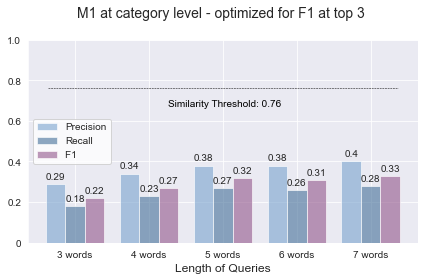

In [539]:
# TOP 3 M1 AT CATEGORY LEVEL
labels = "n_words"
filename = 'visualizations/M1scores_at_top3.png'
threshold = 0.76
title = 'M1 at category level - optimized for F1 at top 3 \n'
bar_chart(M1_top3 , labels, title, filename, threshold)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


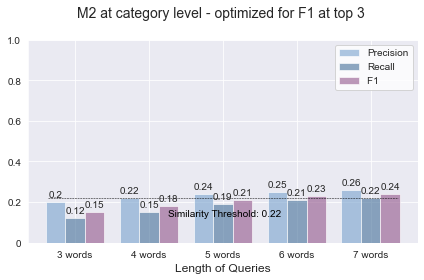

In [454]:
# TOP 3 M2R1 AT CATEGORY LEVEL
labels = "n_words"
filename = 'visualizations/M2scores_at_top3.png'
threshold = 0.22
title = 'M2 at category level - optimized for F1 at top 3 \n'
bar_chart(M2R1_top3 , labels, title, filename, threshold)

# TOP 3 M2R1 AT ASIN LEVEL
# labels = "n_words"
# filename = 'visualizations/M2R1scores_at_top3_asin.png'
# threshold = 0.22
# title = 'Scores for M2 at asin level - optimized for F1 at top 3 \n'
# bar_chart(M2R1_top3_asin , labels, title, filename, threshold)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


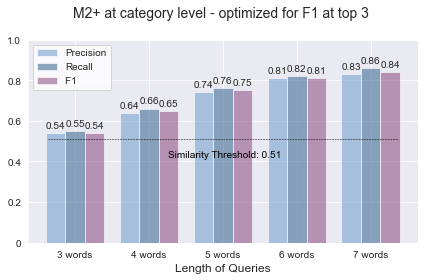

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


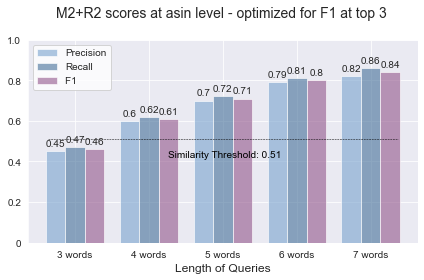

In [455]:
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
# TOP 3 CATEGORY AT CATEGORY LEVEL M2+R2
labels = "n_words"
filename = 'visualizations/M2+_at_top3.png'
threshold = 0.51
title = 'M2+ at category level - optimized for F1 at top 3 \n'
bar_chart(M2pR2_top3 , labels, title, filename, threshold)


# TOP 3 M2R2 asin
labels = "n_words"
filename = 'visualizations/scores_M2+R2_at_asin_top3.png'
threshold = 0.51
title = 'M2+R2 scores at asin level - optimized for F1 at top 3 \n'
bar_chart(M2pR2_top3_asin, labels, title, filename, threshold)


### M2+R2 SCORES BY SIMILARITY THRESHOLD

In [456]:
def chart_with_tooltip(source, x, y, color, tooltip, title, chart_type):
    domain = source[color].unique()
    # range_ = ["#92568B","#79A3CE", "#49BCDF", "#16D4D9", "#57E7BB"][:len(domain)]
    range_ = ["#57E7BB","#16D4D9", "#49BCDF", "#79A3CE", "#92568B"][:len(domain)]
    
    chart1 = alt.Chart(df_reduced).mark_line().encode(
            alt.X('{}:Q'.format(x)),
            alt.Y('{}:Q'.format(y)),
            color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)),
            tooltip="{}:Q".format(tooltip))

    nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=[x], empty='none')

        # The basic line
    
    line = alt.Chart(source).mark_line(interpolate='basis').encode(
            alt.X('{}:Q'.format(x)),
            alt.Y('{}:Q'.format(y)),
            color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)))
    
    if chart_type == "point":    
        point = alt.Chart(source).mark_point(interpolate='basis').encode(
                alt.X('{}:Q'.format(x)),
                alt.Y('{}:Q'.format(y)),
                color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)))

        # Transparent selectors across the chart. This is what tells us
        # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
            x='{}:Q'.format(x),
            opacity=alt.value(0),
        ).add_selection(
            nearest)

        # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0))    )

        # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, '{}:Q'.format(y), alt.value(' ')))

        # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
            x='{}:Q'.format(x),
        ).transform_filter(
            nearest
        )
        # Put the five layers into a chart and bind the data
     
    if chart_type == "point":
        chart = alt.layer(
            point, selectors, points, rules, text
            ).properties(
                width=300, height=220,
            title=alt.TitleParams(text=title, fontSize = 15, fontWeight = 400), 
            padding={"left": 10, "top": 10, "right": 10, "bottom": 10}
            ) #.configure(background='#F2F2F2')
        
    else:
        
        
        chart = alt.layer(
                line, selectors, points, rules, text
            ).properties(
                width=300, height=220,
            title=alt.TitleParams(text=title, fontSize = 14, fontWeight = 400), 
            padding={"left": 10, "top": 10, "right": 10, "bottom": 10}
            ) #.configure(background='#F2F2F2')

        
    return chart 
source = M2R2
x = 'threshold'
y = 'F1_asin'
color = 'n_words'
tooltip = y
chart_type = "line"
title = 'F1 score by similarity threshold - M2+R2 model at asin level top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)


alt.LayerChart(...)

In [457]:
M2R2.columns

Index(['n_words', 'stem_words', 'threshold', 'queries', 'match', 'TP', 'FP',
       'FN', 'TN', 'TP_asin', 'FN_asin', 'FP_asin', 'TN_asin', 'accuracy',
       'Precision', 'Recall', 'accuracy_asin', 'Precision_asin', 'Recall_asin',
       'F1', 'F1_asin', 'top_n'],
      dtype='object')

In [458]:
y = 'Recall_asin'
tooltip = y
chart_type = "line"
title = 'Recall score by similarity threshold - M2+R2 model at asin level top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)

alt.LayerChart(...)

In [459]:
y = 'Precision_asin'
tooltip = y
chart_type = "line"
title = 'Precision score by similarity threshold - M2+R2 model at asin level top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)

alt.LayerChart(...)

In [491]:
source = M2R2
source["FP_asin rate"] = np.round(source["FP_asin"] / (source["TN_asin"]+ source["FP_asin"]),2)
source["TP_asin rate"] = np.round(source["TP_asin"] / (source["TP_asin"]+ source["FN_asin"]),2)
source = source[["n_words","FP_asin rate","TP_asin rate"]]
gb = source.groupby(["n_words","FP_asin rate"]).agg({"TP_asin rate":"mean"}).reset_index()
source = gb
x = 'FP_asin rate'
y = 'TP_asin rate'
color = "n_words"
tooltip = 'TP_asin rate'
chart_type = "point"
title = 'TP vs FP score - M2+R2 model at asin level top 3'
chart = chart_with_tooltip(source, x, y, color, tooltip, title,chart_type)
chart

alt.LayerChart(...)

In [496]:
M2pR2_top3_asin

,n_words,Precision,Recall,F1
0,3 words,0.45,0.47,0.46
2,4 words,0.60,0.62,0.61
4,5 words,0.70,0.72,0.71
6,6 words,0.79,0.81,0.80
8,7 words,0.82,0.86,0.84


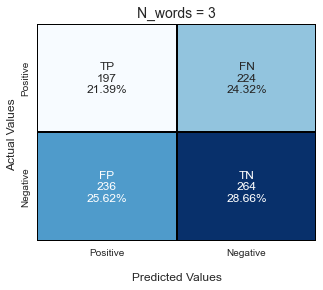

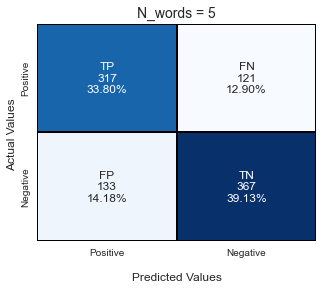

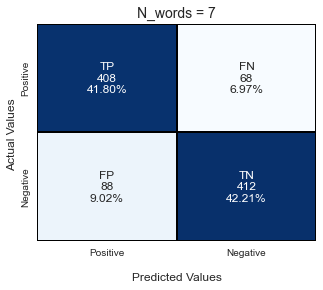

In [4]:

def confusion_matrix(df_full, thre, n, top_n, asin):
    df_5 = df_full[df_full["n_words"] == n]
    if top_n == 3:
        
        df_t = df_5[df_5["threshold"] == thre].iloc[1,]
    else:
        df_t = df_5[df_5["threshold"] == thre].iloc[0,]
    
    if asin: 
        mt = pd.Series(df_t[["TP_asin","FN_asin", "FP_asin","TN_asin"]],dtype=np.int64, name='matrix')
    else:
        mt = pd.Series(df_t[["TP","FN", "FP","TN"]],dtype=np.int64, name='matrix')
        
    fig, ax = plt.subplots()
    fig.set_size_inches(5,4)

    color = "Blues"

    group_percentages = ["{0:.2%}".format(value) for value in mt.values/np.sum(mt.values)]
    group_names = ["TP","FN", "FP","TN"]

    labs = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,mt.values,group_percentages)]

    labels = np.asarray(labs).reshape(2,2)

    ax = sns.heatmap(mt.values.reshape(2,2), annot=labels, fmt='',linecolor='black',linewidths=2,cmap=color, cbar = False, annot_kws={"size": 12})
                     #fmt='.2g',
    ax.set_xlabel('\nPredicted Values', size =12)
    ax.set_ylabel('Actual Values ', size =12)

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Positive','Negative'])
    ax.yaxis.set_ticklabels(['Positive','Negative'])                 
    if asin:
        ax.set_title('N_words = {}'.format(n), size =14)
        filename = 'visualizations/confusion_matrix_top3_asin_{}.png'.format(n)
        fig.savefig(filename, bbox_inches='tight')
        plt.show()
    else:
        filename = 'visualizations/confusion_matrix_top3_asin_n{}.png'.format(n)
        ax.set_title('Threshold = {},  n_words = {}'.format(thre, n), size =14)
        fig.savefig(filename, bbox_inches='tight')
        plt.show()

    
# confusion_matrix(df_full, 0.51, n = 5, asin = False)
confusion_matrix(M2R2, 0.51, n = 3, top_n = 3, asin = True)
confusion_matrix(M2R2, 0.51, n = 5, top_n = 3, asin = True)
confusion_matrix(M2R2, 0.51, n = 7, top_n = 3, asin = True)